# Business Understanding
## Overview
The goal of the "Flu Shot Learning: Predict H1N1" competition is to predict whether individuals received H1N1 vaccines based on their demographic information, opinions, and health behaviors. This predictive model has significant implications for public health initiatives and vaccine campaigns.

## Objective
To predict the probability for each individual receiving:

H1N1 Vaccine: The likelihood that a person received the H1N1 flu vaccine.

## Data Understanding
The dataset is derived from the National 2009 H1N1 Flu Survey and contains information on 26,707 respondents, with each row representing one individual's responses. The dataset includes:

* Demographic Information: Age group, sex, race, education, income, and employment status.

* Health Behaviors: Measures like washing hands, avoiding large gatherings, and antiviral medication usage.

* Opinions and Knowledge: Levels of concern and knowledge about the H1N1 flu, opinions on vaccine effectiveness, and perceived risks.

* Health and Medical Data: Presence of chronic medical conditions, health insurance status, and healthcare worker status.

* Doctor Recommendations: Whether a doctor recommended the H1N1.

# 1. Load the Data with Pandas

In the cell below, we:
* Importing all the necessary libraries

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")

In the cell below, load `training_set_features.csv` as `train_features`:

In [2]:
#reading the csv file to read and check the data 
train_features = pd.read_csv("data/training_set_features.csv")
train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In the cell below, load `training_set_labels.csv` as `train_labels`:

In [3]:
train_labels = pd.read_csv("data/training_set_labels.csv")
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


concatenate `train_features` and `train_labels` to form one dataset named `df`

In [4]:
df = pd.concat([train_features, train_labels.drop(columns='respondent_id', axis=1)], axis=1)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


Now you want to get familiar with the data. This step includes:

* Understanding the dimensionality of your dataset

* Investigating what type of data it contains, and the data types used to store it

* Discovering how missing values are encoded, and how many there are

* Getting a feel for what information it does and doesn't contain

* check the existing columns

In [5]:
df.shape

(26707, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

#  Data Cleaning

Choose the columns that are of importance to answer the objective and create a ne `df`

In [8]:
df = df[['respondent_id', 'h1n1_concern', 'h1n1_knowledge','behavioral_antiviral_meds', 'doctor_recc_h1n1','chronic_med_condition',
        'child_under_6_months', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine']]
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0
1,1,3.0,2.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0
2,2,1.0,1.0,0.0,NaN,1.0,0.0,3.0,1.0,1.0,0
3,3,1.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,5.0,0
4,4,2.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,0.0,4.0,2.0,2.0,0
26704,26704,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0


* Investigating what type of data it contains, and the data types used to store it

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   doctor_recc_h1n1             24547 non-null  float64
 5   chronic_med_condition        25736 non-null  float64
 6   child_under_6_months         25887 non-null  float64
 7   opinion_h1n1_vacc_effective  26316 non-null  float64
 8   opinion_h1n1_risk            26319 non-null  float64
 9   opinion_h1n1_sick_from_vacc  26312 non-null  float64
 10  h1n1_vaccine                 26707 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 2.2 MB


* Look out for missing values and try to figure out how we can handle them

In [10]:
#checking for missing values 
df.isna().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
h1n1_vaccine                      0
dtype: int64

What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

* Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")

* Drop rows with missing values

The whole dataset has 26707 rows and the highest column having missing values is `doctor_recc_h1n1` which has 2160 missing values which is about 0.08% of our data.

we see that the null values have a very low impact on our data set therefore we decide to drop the rows.

Now, implement the strategy to drop rows with missing values using code.


In [11]:
#droping null values
df = df.dropna(axis=0)

Check for duplicates

In [12]:
#checking for duplicates 
df.duplicated().value_counts()

False    23392
Name: count, dtype: int64

 # EDA(Exploratory Data Analysis)
 
 This is the phase in the EDA(Exploratory Data Analysis) process where we examine summary statistics and visualize distributions.
 
 Get the basic statistics of our dataset

In [13]:
# getting basic statistics of our dataset 
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,h1n1_vaccine
count,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000,23392.000000
mean,13350.399581,1.612474,1.280310,0.048991,0.222042,0.284413,0.083747,3.877693,2.340330,2.355335,0.224949
std,7709.284550,0.902594,0.609201,0.215854,0.415628,0.451144,0.277013,1.001198,1.286228,1.362990,0.417557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6685.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000
50%,13328.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
75%,20020.250000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,5.000000,4.000000,4.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000


## Visualization of relationships in columns

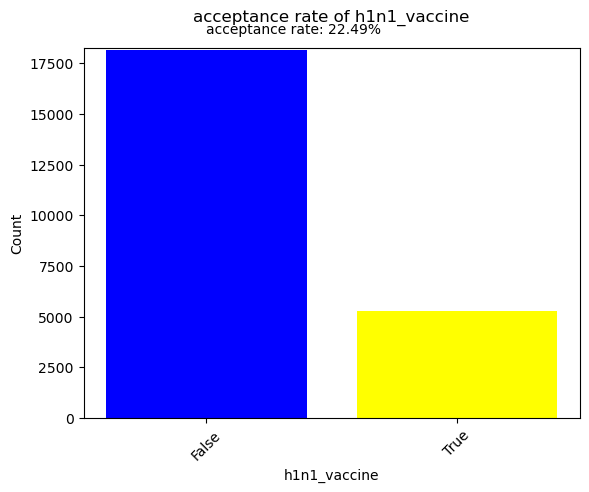

In [14]:
#checking the percentage of acceptance using visual 
h1n1_vaccine_counts = df['h1n1_vaccine'].replace({0: 'False', 1: 'True'}).value_counts()

#calculating the percentage of acceptance 
acceptance_percentage = h1n1_vaccine_counts.get('True', 0) / sum(h1n1_vaccine_counts) * 100
# Plot the bar chart with the correct labels
plt.bar(['False', 'True'], h1n1_vaccine_counts.values, color=['blue', 'yellow'], tick_label=['False', 'True'])
plt.title('acceptance rate of h1n1_vaccine\n')
plt.xlabel('h1n1_vaccine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(h1n1_vaccine_counts) + 100)
# Display loyal percentage only if 'False' exists in h1n1_vaccine_counts
if 'False' in h1n1_vaccine_counts:
    plt.text(0, max(h1n1_vaccine_counts) + 50, f'acceptance rate: {acceptance_percentage:.2f}%\n')
plt.show()


From this graph we get to see that out of the whole population only 21.49% took the vaccine

Let's see the relationship between those who had the knowledge of the vaccine against those who took the vaccine

In [15]:
#visualizing the h1n1_vaccine and h1n1_knowledge 
h1n1_true = (df['h1n1_vaccine'] == 1).sum()
h1n1_know = (df['h1n1_knowledge'] == 1).sum() + (df['h1n1_knowledge'] == 2).sum()

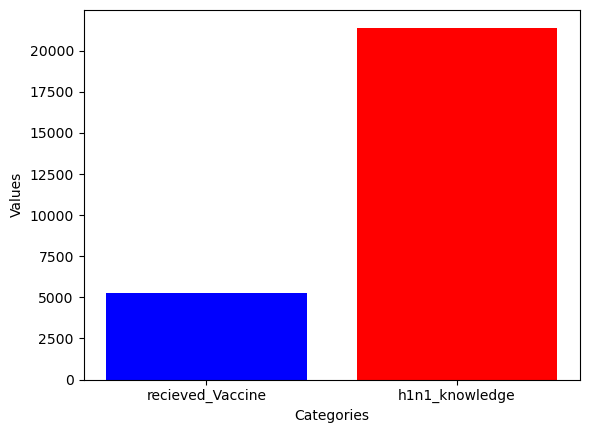

In [16]:
labels = ['recieved_Vaccine', 'h1n1_knowledge']
values = [h1n1_true, h1n1_know]
plt.bar(labels, values, color=['blue', 'red'])

plt.xlabel('Categories')
plt.ylabel('Values')


# Step 5: Display the plot
plt.show()

Let's see the nrelationship between those who had the concern of the vaccine against those who took the vaccine

In [17]:
#visualizing the h1n1_vaccine and h1n1_concern 
h1n1_true = (df['h1n1_vaccine'] == 1).sum()
h1n1_know = (df['h1n1_concern'] == 1).sum() + (df['h1n1_concern'] == 2).sum() + (df['h1n1_concern'] == 3).sum()


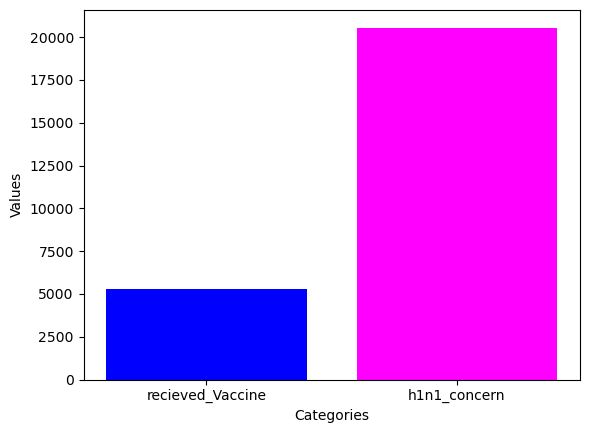

In [18]:
labels = ['recieved_Vaccine', 'h1n1_concern']
values = [h1n1_true, h1n1_know]
plt.bar(labels, values, color=['blue', 'magenta'])

plt.xlabel('Categories')
plt.ylabel('Values')


# Step 5: Display the plot
plt.show()

After exploring our dataset and getting more insights it is paramount now to do modelling for futher analysis of the data.

With that, define appropriate X (predictors) and y (target) in order to model whether or not the participants received the vaccine.

## Train-test split
Split the data into training and test sets

* Assign 20% to the test set

* Set the random_state to 42

In [19]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns='h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We check for class imbalance using the categorical variable

In [20]:
df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    18130
1     5262
Name: count, dtype: int64

# Data Preprocessing

## Standardization
We will use standardization to rescale the features of the dataset to have zero mean and unit variance.

This process will helps us to bring all features to a similar scale, which can be beneficial for our machionel leanring algorithms that are sensitive to the scale of the input features.

In [21]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
using SMOTE to remove class imbalance

SMOTE helps us to address this class imbalance issue by creating synthetic samples of the minority class to balance the dataset.

In [22]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

## 1. Building a baseline logistic regression model

In [23]:
#Buiding a baseline model logistic regression model 

# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.7479324603721571
0.7852105150673221


## Evaluation Metrics

In [24]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

## Classification Report

In [25]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report

In [26]:
# calling the function to get classifification report values
logreg_report = generate_classification_report(y_test, y_test_pred)
logreg_report

,precision,recall,f1-score,support
0,0.914422,0.796961,0.851661,3620.000000
1,0.517717,0.745042,0.610918,1059.000000
accuracy,0.785211,0.785211,0.785211,0.785211
macro avg,0.716069,0.771002,0.731289,4679.000000
weighted avg,0.824635,0.785211,0.797173,4679.000000


* Precision: The precision values for class 0 and class 1 are 0.914422 and 0.517717, respectively. A higher precision indicates that the model has a low rate of false positives for that class. Class 0 has a higher precision than class 1, suggesting that the model is better at predicting class 0 than class 1.

* Recall: The recall values for class 0 and class 1 are 0.796961 and 0.745042, respectively. Recall represents the model's ability to correctly identify positive instances. Similar to precision, class 0 has a higher recall than class 1.

* F1-Score: The F1-scores for class 0 and class 1 are 0.851661 and 0.610918, respectively. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class 0 has a higher F1-score than class 1.

* Accuracy: The accuracy of the model is 0.785211, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence logistic regression has 78.5% prediction accuracy of test data

Based on these metrics, it appears that the model performs relatively better for class 0 compared to class 1

{'roc_auc_train': 0.7479324603721572,
 'roc_auc_test': 0.771001909442349,
 'accuracy_train': 0.7479324603721571,
 'accuracy_test': 0.7852105150673221,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20810830710>}

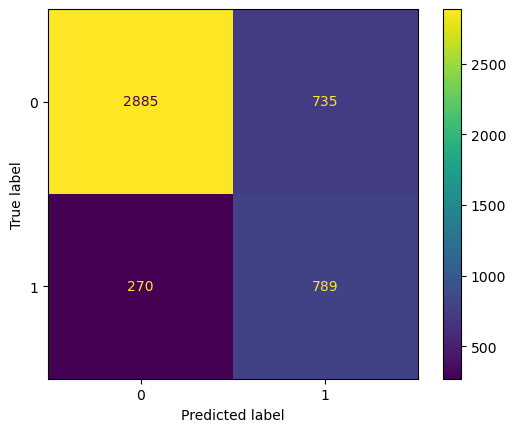

In [27]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(logreg, X_train_scaled,y_train, X_test_scaled, y_test)

* From above it can be seen that logistic regression that roc_auc value on train data is 0.7479324603721572 and test data is 0.771001909442349 this means that model has relatively high level of discrimination between classes on the training data than testing data

* Confusion matrix is used to display the predicted and true labels of logistic regression model where the True positives 789, False negative 735, True Negative 2885 and False positive 270

* In summary, the model achieves a training accuracy of approximately 74.7% and a testing accuracy of around 78.5%. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.

## Cross validation score to improve model performance and reduce overfit

In [28]:
# Create an instance of Logistic Regression with cross-validation
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear', random_state=42)

# Fit the model on the resampled training data
logreg_final.fit(X_train_scaled, y_train)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7479324603721571
Test Acurracy:  0.7852105150673221


## Evaluation Metrics

{'roc_auc_train': 0.7483115093039284,
 'roc_auc_test': 0.7706227599267526,
 'accuracy_train': 0.7483115093039283,
 'accuracy_test': 0.7830733062620218,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20811df6250>}

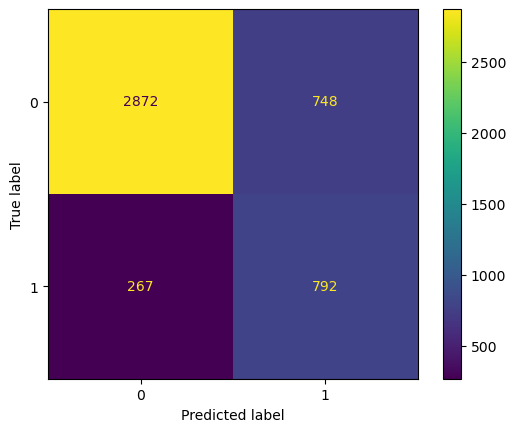

In [29]:
evaluate_model_metrics(logreg_final,X_train_scaled,y_train,X_test_scaled,y_test)

This adjusted model demonstrates no reasonable change in level of performance, correctly predicting the class labels for the majority of instances in both the training and testing datasets.
The testing accuracy is slightly lower than the training accuracy, which is expected but not with a significant difference.
Therefore from the we can proceed the second model to check its perfomance in predicting and check if its a good perfomer than logistic regresion

## 2. Building Decison Trees classifier model

In [30]:
# Create an instance of DecisionTreeClassifier with regularization parameters
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Fit the model on the training data
dt_clf.fit(X_train_scaled, y_train)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_scaled)
y_test_pred_2 = dt_clf.predict(X_test_scaled)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred_2)
test_accuracy = accuracy_score(y_test, y_test_pred_2)
print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7718470020675396
Test Acurracy:  0.7717460995939304


## Evaluation Metrics

{'roc_auc_train': 0.7718470020675396,
 'roc_auc_test': 0.7536156803823059,
 'accuracy_train': 0.7718470020675396,
 'accuracy_test': 0.7717460995939304,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2081278e590>}

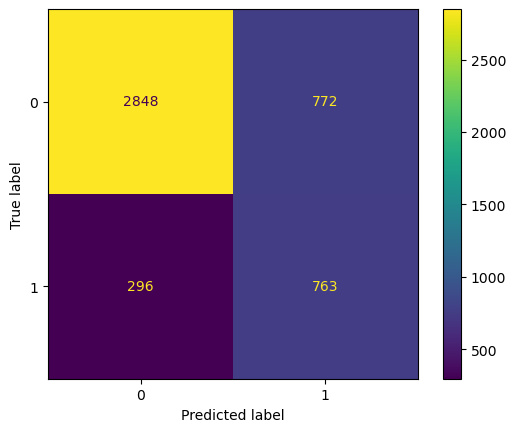

In [31]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test)

* roc_auc_train: It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of 0.77184 indicates that the model performs well in classifying the training instances.

* roc_auc_test:It measures the model's ability to generalize its predictions to unseen data. A value of 0.77184 suggests that the model does maintain a good level of performance on the testing data, indicating that it is not overfitting.

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.77184 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.77184 suggests that the model does perform very well on the testing data, indicating that it generalizes well and is not overfitting.

From the confusion matrix it can be seen that TP 763, TN 2848, FP 772 and FN 296, hence there is improved prediction here
To get futher insights we will check the classification report of all the metrics related to Decison Tree classifier

## Classification Report

In [32]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.905852,0.786740,0.842105,3620.000000
1,0.497068,0.720491,0.588281,1059.000000
accuracy,0.771746,0.771746,0.771746,0.771746
macro avg,0.701460,0.753616,0.715193,4679.000000
weighted avg,0.813332,0.771746,0.784657,4679.000000


* Precision: In class 0, the precision is 0.905852, indicating that 90.6% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.497068, meaning that 49.7% of the instances predicted as class 1 are true positives.

* Recall: In class 0, the recall is 0.786740, indicating that 78.7% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.720491, meaning that 72.0% of the actual class 1 instances are correctly identified as true positives.

* F1-score: In class 0, the F1-score is 0.842105, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.588281, suggesting a slightly lower balance between precision and recall for class 1.

* Accuracy: Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.771746, meaning that the model correctly predicts the class labels for 77.2% of the instances.

* Macro avg: Macro average calculates the average metrics (precision, recall, F1-score) for both classes, giving equal weight to each class which are 0.701460, 0.753616 and 0.715193 while Weighted avg calculates the average metrics, taking into account the support (number of instances) for each class. It provides a weighted average based on the number of instances in each class which are 0.813332, 0.771746 and 0.784657.

## 3. Building a random forest model

In [33]:
# Create a random forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_scaled)
y_test_pred_3 = rf_classifier.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_3)
test_accuracy = accuracy_score(y_test, y_test_pred_3)
print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7818745692625775
Test Acurracy:  0.7997435349433639


## Evaluation Metrics

{'roc_auc_train': 0.7818745692625775,
 'roc_auc_test': 0.7666992732641551,
 'accuracy_train': 0.7818745692625775,
 'accuracy_test': 0.7997435349433639,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20811c1fd10>}

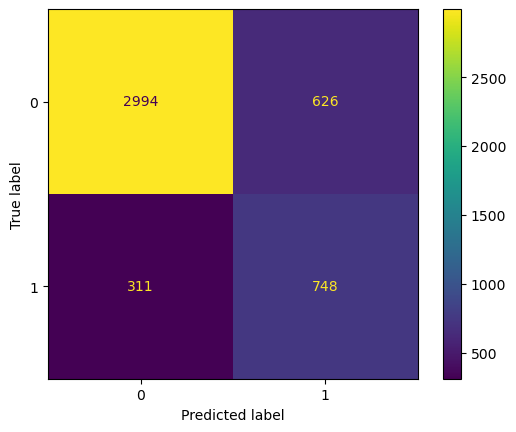

In [34]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

Random Forest classifier achieves an accuracy of approximately 78.9% on the training data and 80.0% on the testing data. It shows good performance in distinguishing between the positive and negative classes, with an area under the ROC curve (AUC) of 0.781 on the training data and 0.767 on the testing data. Overall, the model performs well and demonstrates a high level of accuracy in predicting the target variable.

The confusion matrix TP is 748, TN is 2994, FP is 626 and FN is 311

This accuracy is slightly higher than the one for Decison tree classifier

## Classification Report

In [35]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.905900,0.827072,0.864693,3620.000000
1,0.544396,0.706327,0.614879,1059.000000
accuracy,0.799744,0.799744,0.799744,0.799744
macro avg,0.725148,0.766699,0.739786,4679.000000
weighted avg,0.824081,0.799744,0.808153,4679.000000


For class 0 (negative class):

* Precision: 90.5% indicates that when the model predicts the negative class, it is correct 90.5% of the time.

* Recall: 82.7% means that the model correctly identifies 82.7% of the actual negative instances.

* F1-score: 86.5% is a balanced measure of precision and recall, combining both metrics into a single value.

* Support: 3620 instances of the negative class are present in the dataset.

For class 1 (positive class):

* Precision: 54.4% indicates that when the model predicts the positive class, it is correct 54.4% of the time.

* Recall: 70.6% means that the model correctly identifies 70.6% of the actual positive instances.

* F1-score: 61.5% is a balanced measure of precision and recall for the positive class.

* Support: 1059 instances of the positive class are present in the dataset.

The overall accuracy of the Random forest classifier is approximately 80.0%, indicating the percentage of correctly predicted instances overall.

## 4. Building a KNeighborsClassifier model

In [36]:

# Create and train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Predict on the training and testing sets
y_train_pred_4 = model.predict(X_train_scaled)
y_test_pred_4 = model.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_4)
test_accuracy = accuracy_score(y_test, y_test_pred_4)
print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)



Train Acurracy:  0.8594073053066851
Test Acurracy:  0.7249412267578542


## Evaluation Metrics

{'roc_auc_train': 0.8594073053066851,
 'roc_auc_test': 0.6892968191612019,
 'accuracy_train': 0.8594073053066851,
 'accuracy_test': 0.7249412267578542,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20811dbb5d0>}

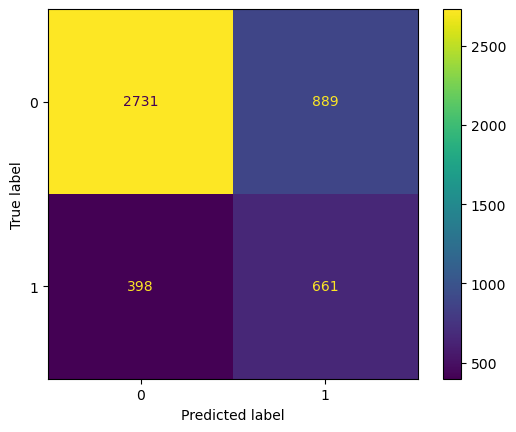

In [37]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(model, X_train_scaled, y_train, X_test_scaled, y_test)

* roc_auc_train: It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of 0.8594073 indicates that the model performs well in classifying the training instances.

* roc_auc_test:It measures the model's ability to generalize its predictions to unseen data. A value of 0.689296 suggests that the model does not maintain a good level of performance on the testing data, indicating that it is overfitting.

* accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.77184 indicates that the model achieves a high level of accuracy on the training data.

* accuracy_test: A value of 0.72494122 suggests that the model does perform very well on the testing data, indicating that it generalizes well and is not overfitting.

From the confusion matrix it can be seen that TP 661, TN 2731, FP 889 and FN 398, hence there is improved prediction here
To get futher insights we will check the classification report of all the metrics related to Knn

## Classification Report

In [38]:
generate_classification_report(y_test, y_test_pred_4)

,precision,recall,f1-score,support
0,0.872803,0.754420,0.809305,3620.000000
1,0.426452,0.624174,0.506708,1059.000000
accuracy,0.724941,0.724941,0.724941,0.724941
macro avg,0.649627,0.689297,0.658006,4679.000000
weighted avg,0.771780,0.724941,0.740818,4679.000000


* Precision: In class 0, the precision is 0.872803, indicating that 87.2% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.426452, meaning that 42.6% of the instances predicted as class 1 are true positives.

* Recall: In class 0, the recall is 0.754420, indicating that 75.4% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.624174, meaning that 62.4% of the actual class 1 instances are correctly identified as true positives.

* F1-score: In class 0, the F1-score is 0.809305, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.506708, suggesting a slightly lower balance between precision and recall for class 1.

* Accuracy: Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.724941, meaning that the model correctly predicts the class labels for 72.5% of the instances.

* Macro avg: Macro average calculates the average metrics (precision, recall, F1-score) for both classes, giving equal weight to each class which are 0.649627, 0.689297 and 0.658006 while Weighted avg calculates the average metrics, taking into account the support (number of instances) for each class. It provides a weighted average based on the number of instances in each class which are 0.771780, 0.724941 and 0.740818.

## 1. Hyperparameter tuning

In [39]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_scaled, y_train)

# Predict on the training data
y_train_pred = best_model.predict(X_train_scaled)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Compute the accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.8594073053066851
Test Acurracy:  0.7249412267578542


## Evaluation Metrics

{'roc_auc_train': 0.8331495520330806,
 'roc_auc_test': 0.7538529259856322,
 'accuracy_train': 0.8331495520330806,
 'accuracy_test': 0.8082923701645651,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x208127b4550>}

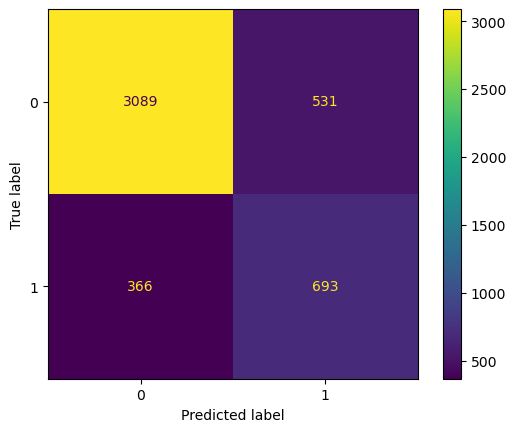

In [40]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

## Classification Report

In [41]:
generate_classification_report(y_test, y_test_pred)

,precision,recall,f1-score,support
0,0.894067,0.853315,0.873216,3620.000000
1,0.566176,0.654391,0.607096,1059.000000
accuracy,0.808292,0.808292,0.808292,0.808292
macro avg,0.730122,0.753853,0.740156,4679.000000
weighted avg,0.819855,0.808292,0.812985,4679.000000


## 2. Using ROC curve to check the best model

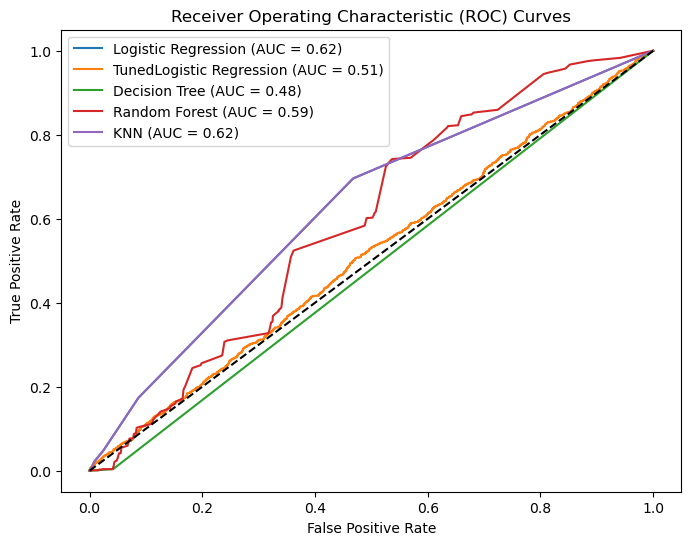

In [42]:
#drawing ROC curve for the above five models 

# Compute ROC curves and AUC scores for each model
models = [model, logreg_final, dt_clf, rf_classifier, model]
labels = ['Logistic Regression','Tuned Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()